In [ ]:
# Kết nối đến Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Xem thư mục "DACNTT2" trên Google Drive.
# Đây là thư mục đang chứa file dataset của bài toán dự đoán giá nhà. Đổi đường dẫn khác tùy theo Google Drive của bạn.
!ls "/content/drive/My Drive/DACNTT2"

datasetAfterDataCleaning.csv  dataset.csv


# Thư viện

In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import statistics
import math

In [ ]:
!pip install Unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 6.3 MB/s eta 0:00:00


In [ ]:
import re
import unidecode

# I. Xem dữ liệu

## 1.1 Đọc dữ liệu

In [ ]:
# Nạp dữ liệu:
dtset = pd.read_csv('/content/drive/My Drive/DACNTT2/dataset.csv') # Raw Dataset: dữ liệu lúc crawl về, chưa chỉnh sửa gì hết.
#dtset = pd.read_csv('dataset.csv') # Trường hợp không sử dụng kết nối với Google Drive.
dtset_columns = dtset.columns.tolist()
print("+ Shape: ", dtset.shape) # (số Dòng, số Cột)
print("+ Column: ", dtset_columns) # Tên các cột thuộc tính.
dtset.info()

+ Shape:  (20500, 23)
+ Column:  ['Tiêu đề', 'Địa chỉ', 'Khu vực', 'Ngày đăng', 'Ngày hết hạn', 'Loại tin', 'Mã tin', 'Người đăng', 'Khoảng giá phổ biến Min', 'Giá phổ biến nhất', 'Khoảng giá phổ biến Max', 'Giá của tin đang xem', 'Diện tích', 'Mức giá', 'Mặt tiền', 'Đường vào', 'Hướng nhà', 'Hướng ban công', 'Số tầng', 'Số phòng ngủ', 'Số toilet', 'Pháp lý', 'Nội thất']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Tiêu đề                      20498 non-null  object
 1   Địa chỉ                      20498 non-null  object
 2   Khu vực                      20499 non-null  object
 3   Ngày đăng                    20500 non-null  object
 4   Ngày hết hạn                 20500 non-null  object
 5   Loại tin                     20500 non-null  object
 6   Mã tin                       20500 non-null  int

In [ ]:
dtset.head(3)

,Tiêu đề,Địa chỉ,Khu vực,Ngày đăng,Ngày hết hạn,Loại tin,Mã tin,Người đăng,Khoảng giá phổ biến Min,Giá phổ biến nhất,...,Mức giá,Mặt tiền,Đường vào,Hướng nhà,Hướng ban công,Số tầng,Số phòng ngủ,Số toilet,Pháp lý,Nội thất
0,Duy nhất! Bán tòa nhà văn phòng mặt tiền Trần ...,"Đường Trần Hưng Đạo, Phường Nguyễn Cư Trinh, Q...",Quận 1,14/06/2023,24/06/2023,Tin thường,37301729,Thanh,327 triệu/m²,466 triệu/m²,...,180 tỷ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bán nhà kế chung cư Thủy Lợi ngang 5x20m hẻm x...,"Phố Nguyễn Xí, Phường 13, Bình Thạnh, Hồ Chí Minh",Bình Thạnh,12/06/2023,22/06/2023,Tin thường,37102571,Ls Lê Tân,107 triệu/m²,133 triệu/m²,...,"9,5 tỷ",NaN,NaN,NaN,NaN,2 tầng,2 phòng,3 phòng,Sổ đỏ/ Sổ hồng,Đầy đủ
2,"Nhà mặt tiền 1T3L kinh doanh xây kiên cố 1T3L,...","Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức,16/06/2023,26/06/2023,Tin thường,36835594,Nguyễn Trinh,109 triệu/m²,161 triệu/m²,...,"12,5 tỷ",6 m,7 m,Tây - Nam,NaN,4 tầng,4 phòng,3 phòng,NaN,NaN


In [ ]:
dtset.tail(3)

,Tiêu đề,Địa chỉ,Khu vực,Ngày đăng,Ngày hết hạn,Loại tin,Mã tin,Người đăng,Khoảng giá phổ biến Min,Giá phổ biến nhất,...,Mức giá,Mặt tiền,Đường vào,Hướng nhà,Hướng ban công,Số tầng,Số phòng ngủ,Số toilet,Pháp lý,Nội thất
20497,"Villa sân vườn đường Lê Văn Sỹ, DT: 7x18m. Giá...","Đường Lê Văn Sỹ, Phường 12, Quận 3, Hồ Chí Minh",Quận 3,13/06/2023,23/06/2023,Tin thường,36732299,Văn Lai,144 triệu/m²,192 triệu/m²,...,"17,5 tỷ",NaN,NaN,NaN,NaN,3 tầng,4 phòng,5 phòng,Sổ đỏ/ Sổ hồng,NaN
20498,"Vip P. 10, Q. Phú Nhuận, sát MT, thông Nguyễn ...","Phường 10, Phú Nhuận, Hồ Chí Minh",Phú Nhuận,16/06/2023,26/06/2023,Tin thường,37469613,Nguyễn Ngọc Trúc Mai,173 triệu/m²,221 triệu/m²,...,"16,6 tỷ",NaN,NaN,NaN,NaN,4 tầng,5 phòng,7 phòng,Sổ đỏ/ Sổ hồng,Đầy đủ
20499,Bán nhanh biệt thự Thảo Điền Quận 2 - DT 10x20...,"Đường Trần Ngọc Diện, Phường Thảo Điền, Quận 2...",Quận 2,15/06/2023,25/06/2023,Tin thường,36590138,Nhật Nam,166 triệu/m²,236 triệu/m²,...,35 tỷ,10 m,8 m,NaN,NaN,4 tầng,5 phòng,5 phòng,Sổ đỏ/ Sổ hồng,Đầy đủ


In [ ]:
display(dtset[6:10])

,Tiêu đề,Địa chỉ,Khu vực,Ngày đăng,Ngày hết hạn,Loại tin,Mã tin,Người đăng,Khoảng giá phổ biến Min,Giá phổ biến nhất,...,Mức giá,Mặt tiền,Đường vào,Hướng nhà,Hướng ban công,Số tầng,Số phòng ngủ,Số toilet,Pháp lý,Nội thất
6,Chính chủ bán nhà mặt tiền kinh doanh Đường Số...,"Đường Số 5, Phường 17, Gò Vấp, Hồ Chí Minh",Gò Vấp,19/06/2023,29/06/2023,Tin thường,32172914,Nguyễn Viết Đức,102 triệu/m²,138 triệu/m²,...,"7,7 tỷ",NaN,NaN,NaN,NaN,1 tầng,2 phòng,1 phòng,Sổ đỏ/ Sổ hồng,NaN
7,"Bán nhà HXH xxx Trần Bình Trọng Phường 4, Quận...","Đường Trần Bình Trọng, Phường 4, Quận 5, Hồ Ch...",Quận 5,16/06/2023,26/06/2023,Tin thường,37470799,Đinh Thị Thúy Vy,152 triệu/m²,185 triệu/m²,...,11 tỷ,NaN,NaN,NaN,NaN,3 tầng,NaN,NaN,NaN,NaN
8,"Bán nhà góc 2 mặt tiền Trần Bá Giao, P5, Gò Vấ...","Đường Trần Bá Giao, Phường 5, Gò Vấp, Hồ Chí Minh",Gò Vấp,14/06/2023,24/06/2023,Tin thường,37453295,Hoàng Sang,134 triệu/m²,186 triệu/m²,...,"10,9 tỷ",5 m,NaN,NaN,NaN,5 tầng,10 phòng,NaN,Sổ đỏ/ Sổ hồng,NaN
9,"Mặt tiền 7m ngay khu Hai Bà Trưng, Tân Định, Q...","Phố Hai Bà Trưng, Phường Tân Định, Quận 1, Hồ ...",Quận 1,13/06/2023,23/06/2023,Tin thường,37444791,Vũ Anh Khoa,312 triệu/m²,428 triệu/m²,...,Thỏa thuận,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,NaN


## 1.2 Hiển thị dữ liệu theo cột

In [ ]:
dtset.loc[:2, dtset_columns[0:3]]

,Tiêu đề,Địa chỉ,Khu vực
0,Duy nhất! Bán tòa nhà văn phòng mặt tiền Trần ...,"Đường Trần Hưng Đạo, Phường Nguyễn Cư Trinh, Q...",Quận 1
1,Bán nhà kế chung cư Thủy Lợi ngang 5x20m hẻm x...,"Phố Nguyễn Xí, Phường 13, Bình Thạnh, Hồ Chí Minh",Bình Thạnh
2,"Nhà mặt tiền 1T3L kinh doanh xây kiên cố 1T3L,...","Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức


In [ ]:
print("Loại tin:", dtset[dtset_columns[5]].unique())
dtset.loc[:2, dtset_columns[3:8]]

Loại tin: ['Tin thường' 'Tin VIP Bạc' 'Tin VIP Vàng' 'Tin VIP Kim Cương']


,Ngày đăng,Ngày hết hạn,Loại tin,Mã tin,Người đăng
0,14/06/2023,24/06/2023,Tin thường,37301729,Thanh
1,12/06/2023,22/06/2023,Tin thường,37102571,Ls Lê Tân
2,16/06/2023,26/06/2023,Tin thường,36835594,Nguyễn Trinh


In [ ]:
dtset.loc[:2, dtset_columns[8:12]]

,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Giá của tin đang xem
0,327 triệu/m²,466 triệu/m²,873 triệu/m²,"~481,3 triệu/m²"
1,107 triệu/m²,133 triệu/m²,176 triệu/m²,~95 triệu/m²
2,109 triệu/m²,161 triệu/m²,258 triệu/m²,~108 triệu/m²


In [ ]:
print("Hướng nhà:", dtset[dtset_columns[16]].unique())
print("Hướng ban công:", dtset[dtset_columns[17]].unique())
dtset.loc[:2, dtset_columns[12:18]]

Hướng nhà: [nan 'Tây - Nam' 'Đông' 'Nam' 'Tây - Bắc' 'Bắc' 'Đông - Nam' 'Đông - Bắc'
 'Tây']
Hướng ban công: [nan 'Đông' 'Nam' 'Tây - Bắc' 'Bắc' 'Đông - Nam' 'Tây - Nam' 'Tây'
 'Đông - Bắc']


,Diện tích,Mức giá,Mặt tiền,Đường vào,Hướng nhà,Hướng ban công
0,374 m²,180 tỷ,NaN,NaN,NaN,NaN
1,100 m²,"9,5 tỷ",NaN,NaN,NaN,NaN
2,"115,7 m²","12,5 tỷ",6 m,7 m,Tây - Nam,NaN


In [ ]:
dtset.loc[:2, dtset_columns[18:23]]

,Số tầng,Số phòng ngủ,Số toilet,Pháp lý,Nội thất
0,NaN,NaN,NaN,NaN,NaN
1,2 tầng,2 phòng,3 phòng,Sổ đỏ/ Sổ hồng,Đầy đủ
2,4 tầng,4 phòng,3 phòng,NaN,NaN


In [ ]:
print("Pháp lý:", dtset[dtset_columns[21]].unique())

Pháp lý: [nan 'Sổ đỏ/ Sổ hồng' 'Đang chờ sổ' 'Đã có sổ hồng' 'Sổ đỏ/ Sổ hồng.'
 'Sổ hồng riêng' 'Sổ hồng.' 'Sổ hồng' 'Sổ đỏ chính chủ.' 'Đã có sổ'
 'Sổ hồng chính chủ.' 'Đầy đủ' 'Hợp đồng mua bán' 'Sổ hồng hoàn công đủ'
 'Chủ quyền hồng.' 'Giấy tờ khác.' 'Đã có sổ.' 'Sổ Hồng Trao Tay'
 'Đã có sổ hồng.' 'Có sổ' 'Sổ hồng chính chủ' 'Sổ Hồng Chính Chủ'
 'Sổ hồng riêng đã hoàn công' 'Sổ hồng sang tên ngay.' 'Có sổ hồng riêng'
 'Sổ đỏ/ sổ hồng.' 'Sổ hồng hoàn công' 'Sổ đỏ'
 'Sổ nở hậu, chính chủ lâu đời.' 'Sổ hồngSổ hồng'
 'Sổ hồng chính chủ. Công chứng trong ngày.' 'Có sổ hồng.'
 'Sổ hồng riêng .' 'Đã có sổ hoàn công.' 'Đã có số hồng'
 'Sổ Hồng chính chủ' 'Hợp đồng mua bán, sổ hồng' 'Sổ đỏ.' 'Sổ hồng riêng.'
 'Công chứng Vi bằng' 'Đã Có sổ' 'Đã có sổ hồng riêng' 'Đả có sổ'
 'Sổ Hồng.' 'Sổ hồng chính chủ - Sẵn sàng giao dịch' 'Chờ ký HĐMB.'
 'Có sổ hồng'
 'Sổ chung, khu dân chư hiện hữu, có giấy phép xây dựng, số nhà huyện cấp, (mua bán cc vi bằng).'
 'Đã có sổ'
 'Sổ hồng riêng hoàn công

# II. Xử lý các dòng Duplicate

## 2.1 Xóa cột ngày đăng và ngày hết hạn

In [ ]:
# Kiểm tra các mẫu tin đăng bán nhà có cùng "Mã tin":
matin_duplicate_df = dtset[dtset["Mã tin"].duplicated()]
print("Số dòng dữ liệu bị duplicated Mã tin =", len(matin_duplicate_df))
matin_duplicate_df[31:33]

Số dòng dữ liệu bị duplicated Mã tin = 133


,Tiêu đề,Địa chỉ,Khu vực,Ngày đăng,Ngày hết hạn,Loại tin,Mã tin,Người đăng,Khoảng giá phổ biến Min,Giá phổ biến nhất,...,Mức giá,Mặt tiền,Đường vào,Hướng nhà,Hướng ban công,Số tầng,Số phòng ngủ,Số toilet,Pháp lý,Nội thất
9898,"Nhà mặt tiền 1T3L kinh doanh xây kiên cố 1T3L,...","Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức,16/06/2023,26/06/2023,Tin thường,36835594,Nguyễn Trinh,109 triệu/m²,153 triệu/m²,...,"12,5 tỷ",6 m,7 m,Tây - Nam,NaN,4 tầng,4 phòng,3 phòng,NaN,NaN
9958,"Nhà mặt tiền 1T3L kinh doanh xây kiên cố 1T3L,...","Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức,26/06/2023,06/07/2023,Tin thường,36835594,Nguyễn Trinh,109 triệu/m²,153 triệu/m²,...,"12,5 tỷ",6 m,7 m,Tây - Nam,NaN,4 tầng,4 phòng,3 phòng,NaN,NaN


Do có tồn tại những trường hợp mà "Mã tin" y hệt nhau nhưng lại có sự khác biệt về "Ngày đăng" và "Ngày hết hạn" khiến chúng trở thành những tin riêng biệt. Vì vậy, trước hết chúng ta phải xóa những cột này, thì việc xác định duplicate mới có hiệu quả.

In [ ]:
print("Kích cỡ dataset ban đầu:", dtset.shape)
dtset.drop(['Ngày đăng', 'Ngày hết hạn'], axis=1, inplace=True)
print("Kích cỡ dataset sau khi xóa một số cột thuộc tính:", dtset.shape)
dtset_columns_after = dtset.columns.tolist() # Cập nhật lại danh sách cột thuộc tính.

Kích cỡ dataset ban đầu: (20500, 23)
Kích cỡ dataset sau khi xóa một số cột thuộc tính: (20500, 21)


## 2.2 Xóa duplicates

In [ ]:
# Kiểm tra xem có dữ liệu nào bị trùng lập không:
duplicate_df = dtset[dtset.duplicated()] # Lưu các dòng bị trùng vào dataframe riêng biệt.
duplicate_df = duplicate_df.reset_index() # Reset lại Index của dataframe mới.
#display(duplicate_df)
print("Số lượng dòng bị trùng theo lý thuyết =", len(duplicate_df))

Số lượng dòng bị trùng theo lý thuyết = 126


In [ ]:
duplicate_df.loc[:2, dtset_columns_after] # Hiển thị 3 dòng trong dataframe chứa duplicate.

,Tiêu đề,Địa chỉ,Khu vực,Loại tin,Mã tin,Người đăng,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Giá của tin đang xem,...,Mức giá,Mặt tiền,Đường vào,Hướng nhà,Hướng ban công,Số tầng,Số phòng ngủ,Số toilet,Pháp lý,Nội thất
0,Chính chủ bán nhà mặt tiền Phan Đăng Lưu-Hoàng...,"Phố Phan Đăng Lưu, Phường 7, Bình Thạnh, Hồ Ch...",Bình Thạnh,Tin thường,37459258,Phan Thảo,159 triệu/m²,212 triệu/m²,329 triệu/m²,"~224,1 triệu/m²",...,39 tỷ,NaN,NaN,NaN,NaN,3 tầng,NaN,NaN,Sổ hồng,NaN
1,"Hẻm xe tải 10 mét, bán nhà Nguyễn Hữu Cảnh, 60...","Đường Nguyễn Hữu Cảnh, Phường 22, Bình Thạnh, ...",Bình Thạnh,Tin thường,35705900,Hải Vinh,99 triệu/m²,142 triệu/m²,235 triệu/m²,~225 triệu/m²,...,"13,5 tỷ","3,6 m",10 m,NaN,NaN,5 tầng,5 phòng,5 phòng,Sổ đỏ/ Sổ hồng,NaN
2,"Nhà mặt tiền 1T3L kinh doanh xây kiên cố 1T3L,...","Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức,Tin thường,36835594,Nguyễn Trinh,109 triệu/m²,153 triệu/m²,259 triệu/m²,~108 triệu/m²,...,"12,5 tỷ",6 m,7 m,Tây - Nam,NaN,4 tầng,4 phòng,3 phòng,NaN,NaN


In [ ]:
# Ví dụ về tất cả các dòng bị trùng Địa Chỉ của một mẫu dữ liệu:
diachivalue = duplicate_df["Địa chỉ"].iloc[0] # Lấy giá trị Địa Chỉ của dòng ở vị trí index=0 trong dataframe chứa duplicates.
print("Data Type =", type(diachivalue)) # Giá trị này có kiểu String.
dtset.loc[dtset['Địa chỉ'] == diachivalue] # Quay lại Dataset gốc, hiển thị tất cả các dòng trùng nhau.

Data Type = <class 'str'>


,Tiêu đề,Địa chỉ,Khu vực,Loại tin,Mã tin,Người đăng,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Giá của tin đang xem,...,Mức giá,Mặt tiền,Đường vào,Hướng nhà,Hướng ban công,Số tầng,Số phòng ngủ,Số toilet,Pháp lý,Nội thất
113,Chính chủ bán nhà mặt tiền Phan Đăng Lưu-Hoàng...,"Phố Phan Đăng Lưu, Phường 7, Bình Thạnh, Hồ Ch...",Bình Thạnh,Tin thường,37459258,Phan Thảo,159 triệu/m²,212 triệu/m²,329 triệu/m²,"~224,1 triệu/m²",...,39 tỷ,NaN,NaN,NaN,NaN,3 tầng,NaN,NaN,Sổ hồng,NaN
114,Chính chủ bán nhà mặt tiền Phan Đăng Lưu-Hoàng...,"Phố Phan Đăng Lưu, Phường 7, Bình Thạnh, Hồ Ch...",Bình Thạnh,Tin thường,37459258,Phan Thảo,159 triệu/m²,212 triệu/m²,329 triệu/m²,"~224,1 triệu/m²",...,39 tỷ,NaN,NaN,NaN,NaN,3 tầng,NaN,NaN,Sổ hồng,NaN
3019,"Bán nhà mặt tiền Phan Đăng Lưu Q. PN, 437m2 sà...","Phố Phan Đăng Lưu, Phường 7, Bình Thạnh, Hồ Ch...",Bình Thạnh,Tin thường,36273923,Viminh@hecoland.vn,159 triệu/m²,212 triệu/m²,329 triệu/m²,"~132,3 triệu/m²",...,25 tỷ,NaN,NaN,NaN,NaN,3 tầng,3 phòng,3 phòng,NaN,NaN
19015,"Bán gấp nhà hẻm lớn, 55m2, 3T + lửng, hẻm thôn...","Phố Phan Đăng Lưu, Phường 7, Bình Thạnh, Hồ Ch...",Bình Thạnh,Tin thường,37438659,Phạm Gia Hân,117 triệu/m²,151 triệu/m²,222 triệu/m²,"~114,6 triệu/m²",...,"6,3 tỷ",NaN,NaN,NaN,NaN,3 tầng,4 phòng,3 phòng,Sổ đỏ/ Sổ hồng,Đầy đủ


In [ ]:
# Làm tương tự với cột thuộc tính Tiêu đề, thì
# ví dụ về tất cả các dòng bị trùng Tiêu đề của một mẫu dữ liệu:
tieudevalue = duplicate_df["Tiêu đề"].iloc[0]
print("Data Type =", type(tieudevalue))
dtset.loc[dtset["Tiêu đề"] == tieudevalue]

Data Type = <class 'str'>


,Tiêu đề,Địa chỉ,Khu vực,Loại tin,Mã tin,Người đăng,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Giá của tin đang xem,...,Mức giá,Mặt tiền,Đường vào,Hướng nhà,Hướng ban công,Số tầng,Số phòng ngủ,Số toilet,Pháp lý,Nội thất
113,Chính chủ bán nhà mặt tiền Phan Đăng Lưu-Hoàng...,"Phố Phan Đăng Lưu, Phường 7, Bình Thạnh, Hồ Ch...",Bình Thạnh,Tin thường,37459258,Phan Thảo,159 triệu/m²,212 triệu/m²,329 triệu/m²,"~224,1 triệu/m²",...,39 tỷ,NaN,NaN,NaN,NaN,3 tầng,NaN,NaN,Sổ hồng,NaN
114,Chính chủ bán nhà mặt tiền Phan Đăng Lưu-Hoàng...,"Phố Phan Đăng Lưu, Phường 7, Bình Thạnh, Hồ Ch...",Bình Thạnh,Tin thường,37459258,Phan Thảo,159 triệu/m²,212 triệu/m²,329 triệu/m²,"~224,1 triệu/m²",...,39 tỷ,NaN,NaN,NaN,NaN,3 tầng,NaN,NaN,Sổ hồng,NaN


"Địa chỉ" của một số mẫu tin có thể trùng nhau, nhưng "Tiêu đề" và quan trọng nhất là "Mức giá" thì không. Do đó, chúng ta cần lưu ý, để đừng thấy các dòng có Địa chỉ giống nhau là bối rối. Việc mẫu tin này với mẫu tin nọ có Địa chỉ trùng nhau là hết sức bình thường, đặc biệt là khi chúng ta đã xử lý dữ liệu thô ban đầu bằng cách xóa đi một số cột thuộc tính (như Tiêu đề, Người đăng, Loại tin, Mã tin) và điều chỉnh lại các thông tin về Số phòng, Số tầng, Số toliet, .v.v để chúng không NaN, rỗng hoặc Missing. Dù cho có xử lý Duplicate ở bước này rồi, nhưng nếu Dataset thành quả khi xét lại mà bỗng thấy có Duplicate mới xuất hiện thì cũng không có gì kỳ lạ cả.

In [ ]:
# Trừ row gốc giữ lại, thì xóa những tất cả những rows bị trùng lập phía sau nó:
print("Kích cỡ dataset ban đầu:", dtset.shape)
dtset = dtset.drop_duplicates()
dtset = dtset.reset_index(drop=True)
print("Kích cỡ sau khi xóa những dòng bị Duplicate", dtset.shape)

Kích cỡ dataset ban đầu: (20500, 21)
Kích cỡ sau khi xóa những dòng bị Duplicate (20374, 21)


## 2.3 Xóa những dòng duplicate về mã tin

Theo lý mà nói, thì xong bước vừa rồi, dataset sẽ không còn duplicates nữa. Nhưng thực tế thì không phải thế, bởi vì việc khác nhau giữa ngày đăng và ngày hết hạn sẽ còn dẫn tới sự khác biệt về 'Khoảng giá phổ biến Min', 'Giá phổ biến nhất' và 'Khoảng giá phổ biến Max', vốn là những thông tin được cập nhật tự động vào mỗi thứ năm hàng tuần trên website batdongsan.com.vn. Nói cách khác, tồn tại những dòng có cùng mã tin nhưng lại khác ngày đăng, ngày hết hạn và các khoảng giá khiến chúng trở thành những mẫu tin bán nhà tách biệt. Do đó, ta phải kiểm tra duplicate lại một lần nữa và xóa đi những mẫu tin có cùng mã tin.

In [ ]:
# Kiểm tra các mẫu tin đăng bán nhà có cùng "Mã tin":
matin_duplicate_df = dtset[dtset["Mã tin"].duplicated()]
print("Rows with similar Mã tin length =", len(matin_duplicate_df))
matin_duplicate_df.head(3)

Rows with similar Mã tin length = 7


,Tiêu đề,Địa chỉ,Khu vực,Loại tin,Mã tin,Người đăng,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Giá của tin đang xem,...,Mức giá,Mặt tiền,Đường vào,Hướng nhà,Hướng ban công,Số tầng,Số phòng ngủ,Số toilet,Pháp lý,Nội thất
1413,"Nhà mặt tiền 1T3L kinh doanh xây kiên cố 1T3L,...","Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức,Tin thường,36835594,Nguyễn Trinh,109 triệu/m²,153 triệu/m²,259 triệu/m²,~108 triệu/m²,...,"12,5 tỷ",6 m,7 m,Tây - Nam,NaN,4 tầng,4 phòng,3 phòng,NaN,NaN
7736,BÁN NHANH TRONG THÁNG 6 NOVALAND GOLF PARK Q. ...,"Golf Park, Số 1, Đường Số 2, Phường Long Thạnh...",Quận 9,Tin VIP Kim Cương,37457923,Thai Thanh,79 triệu/m²,NaN,NaN,"~70,3 triệu/m²",...,"5,8 tỷ",8 m,8 m,Đông - Bắc,Đông,3 tầng,4 phòng,NaN,Đang chờ sổ,Đầy đủ
11468,BÁN NHÀ PHỐ LAKEVIEW CTIY CỰC ĐẸP,"Dự án Lakeview City, Đường Song Hành, Phường A...",Quận 2,Tin VIP Kim Cương,37403113,Thanh Thảo,118 triệu/m²,156 triệu/m²,186 triệu/m²,"~129,5 triệu/m²",...,"25,9 tỷ",NaN,NaN,NaN,NaN,4 tầng,5 phòng,6 phòng,Hợp đồng mua bán,Đầy đủ


In [ ]:
# Ví dụ về tất cả các dòng bị trùng Mã tin của một mẫu dữ liệu:
matinvalue = matin_duplicate_df["Mã tin"].iloc[0] # Lấy giá trị Mã tin của dòng ở vị trí index=0 trong dataframe chứa duplicates.
print("Data Type =", type(matinvalue)) # Giá trị này có kiểu int.
dtset.loc[dtset["Mã tin"] == matinvalue] # Quay lại Dataset gốc, hiển thị tất cả các dòng có Mã tin trùng nhau.

Data Type = <class 'numpy.int64'>


,Tiêu đề,Địa chỉ,Khu vực,Loại tin,Mã tin,Người đăng,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Giá của tin đang xem,...,Mức giá,Mặt tiền,Đường vào,Hướng nhà,Hướng ban công,Số tầng,Số phòng ngủ,Số toilet,Pháp lý,Nội thất
2,"Nhà mặt tiền 1T3L kinh doanh xây kiên cố 1T3L,...","Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức,Tin thường,36835594,Nguyễn Trinh,109 triệu/m²,161 triệu/m²,258 triệu/m²,~108 triệu/m²,...,"12,5 tỷ",6 m,7 m,Tây - Nam,NaN,4 tầng,4 phòng,3 phòng,NaN,NaN
1413,"Nhà mặt tiền 1T3L kinh doanh xây kiên cố 1T3L,...","Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức,Tin thường,36835594,Nguyễn Trinh,109 triệu/m²,153 triệu/m²,259 triệu/m²,~108 triệu/m²,...,"12,5 tỷ",6 m,7 m,Tây - Nam,NaN,4 tầng,4 phòng,3 phòng,NaN,NaN


In [ ]:
MaTin_Index_ToDelete = [] # Tạo biến List để chứa index của những Duplicate này.
for ind in matin_duplicate_df.index:
  MaTin_Index_ToDelete.append(ind)
print("-> Index Count =", len(MaTin_Index_ToDelete))
print("-> Index List:", MaTin_Index_ToDelete) # Từ biến List ấy, ta có thể quay lại Dataset gốc để xóa
# các dòng thứ hai trở về sau có xuất hiện cùng mã tin với dòng đầu tiên.

-> Index Count = 7
-> Index List: [1413, 7736, 11468, 11590, 11844, 14218, 16010]


In [ ]:
print("Kích cỡ dataset ban đầu:", dtset.shape)
for ind in MaTin_Index_ToDelete:
  dtset = dtset.drop(ind)
  #print(dtset.index.get_loc(ind))
dtset = dtset.reset_index(drop=True)
print("Kích cỡ sau khi xóa những dòng bị Duplicated:", dtset.shape)

Kích cỡ dataset ban đầu: (20374, 21)
Kích cỡ sau khi xóa những dòng bị Duplicated: (20367, 21)


# III. Xóa cột thuộc tính

## 3.1 Xóa cột có nhiều Missing Data

In [ ]:
print("Dataset shape:", dtset.shape)

Dataset shape: (20367, 21)


In [ ]:
# Kiểm tra số lượng missing value ở từng cột theo tỷ lệ phần trăm:
dtset.isnull().sum()/dtset.shape[0] * 100.00

Tiêu đề                         0.009820
Địa chỉ                         0.009820
Khu vực                         0.004910
Loại tin                        0.000000
Mã tin                          0.000000
Người đăng                      0.000000
Khoảng giá phổ biến Min     6.981882
Giá phổ biến nhất               7.904944
Khoảng giá phổ biến Max     1.541710
Giá của tin đang xem           11.670840
Diện tích                       0.009820
Mức giá                         0.000000
Mặt tiền                       58.899200
Đường vào                      59.458929
Hướng nhà                      79.692640
Hướng ban công                 89.271861
Số tầng                        28.040458
Số phòng ngủ                   35.513330
Số toilet                      40.889674
Pháp lý                        29.965140
Nội thất                       58.054696
dtype: float64

In [ ]:
phaply = dtset["Pháp lý"].copy()
phaply_UniqueCount = phaply.value_counts()
print(phaply_UniqueCount)

Sổ đỏ/ Sổ hồng                     10820
Sổ đỏ/ Sổ hồng.                     1048
Sổ hồng                              470
Hợp đồng mua bán                     237
Đã có sổ                             201
                                   ...  
Sổ hồng Riêng                          1
Sổ hồng riêng hoàng công đầy đủ        1
Sổ hồng hoàn công đầy đủ.              1
Sổ Hồng cá nhân                        1
Mua bán vi bằng.                       1
Name: Pháp lý, Length: 385, dtype: int64


Khi kiểm tra Missing Data, thì chúng ta thấy rằng dữ liệu thu về chỉ có khoảng hơn 20.000 mẫu nhưng một số cột thuộc tính lại bị missing quá nhiều. Do đó, không còn cách nào khác, ta đành phải xóa chúng đi. Các cột có nhiều giá trị bị khuyết (hơn 50% toàn dữ liệu) xếp theo thứ tự từ lớn đến bé là: "Hướng ban công", "Hướng nhà", "Đường vào", "Mặt tiền", "Nội thất".


Riêng đối với "Pháp lý", thì đây là thông tin mà người bán hoặc môi giới bán nhà tự do khai báo, không có quy củ cụ thể nào cả, trình bày nội dung không liên quan tới giấy tờ hay thậm chí không khai báo gì cũng được hết. Bởi vì các giá trị của "Pháp lý" khá đa dạng với khoảng gần 400 unique value và phức tạp trong khâu xử lý dữ liệu với việc "Vi bằng", "Hợp đồng mua bán", "Hợp đồng đặt cọc", "Giấy tay", "Sổ hồng" hay "Sổ đỏ" đều có ý nghĩa pháp lý riêng biệt. Rất khó để giữ trọn vẹn ý nghĩa của trường thông tin này và càng khó hơn để xử lý gần 30% trên tổng thể datasset bị missing phần "Pháp lý". Do đó, chúng ta sẽ loại bỏ trường thông tin này.

In [ ]:
# Xóa những cột thuộc tính bị missing quá nhiều:
print("Kích cỡ dataset ban đầu:", dtset.shape)
dtset.drop(["Hướng ban công", "Hướng nhà", "Đường vào", "Mặt tiền", "Nội thất", "Pháp lý"], axis=1, inplace=True)
print("Kích cỡ dataset sau khi xóa một số cột thuộc tính:", dtset.shape)

Kích cỡ dataset ban đầu: (20367, 21)
Kích cỡ dataset sau khi xóa một số cột thuộc tính: (20367, 15)


In [ ]:
dtset_columns_after = dtset.columns.tolist() # Cập nhật lại danh sách cột thuộc tính.

## 3.2 Xóa cột ít hoặc không liên quan tới dự đoán

In [ ]:
print("Dataset shape:", dtset.shape)
print(dtset_columns_after)

Dataset shape: (20367, 15)
['Tiêu đề', 'Địa chỉ', 'Khu vực', 'Loại tin', 'Mã tin', 'Người đăng', 'Khoảng giá phổ biến Min', 'Giá phổ biến nhất', 'Khoảng giá phổ biến Max', 'Giá của tin đang xem', 'Diện tích', 'Mức giá', 'Số tầng', 'Số phòng ngủ', 'Số toilet']


Trong số 15 cột thuộc tính còn lại, những cột ta có thể xóa là:


1.   Không liên quan tới dự đoán giá nhà của mẫu tin: 'Người đăng'.
2.   Ít quan trọng: 'Tiêu đề', 'Loại tin', 'Mã tin'.


Với 'Tiêu đề' là thứ người đăng tin tùy hứng khai báo, còn 'Loại tin' (ví dụ: Tin thường, Tin VIP Bạc, Tin VIP Vàng, Tin VIP Kim Cương) không thật sự rõ ý nghĩa và 'Mã tin' không còn quan trọng nữa, do nó đã được chúng ta xử lý duplicate trước đó rồi.

Bên cạnh đó, 'Giá của tin đang xem' tuy gần bằng với giá trị của 'Mức giá' chia cho 'Diện tích' nhưng lại là thứ người dùng web sẽ không bao giờ nhập. Do đó, chúng ta cũng phải loại bỏ bớt cột này đi.

In [ ]:
print("Kích cỡ dataset ban đầu:", dtset.shape)
dtset.drop(['Người đăng', 'Tiêu đề', 'Loại tin', 'Mã tin', 'Giá của tin đang xem'], axis=1, inplace=True)
print("Kích cỡ dataset sau khi xóa một số cột thuộc tính:", dtset.shape)

Kích cỡ dataset ban đầu: (20367, 15)
Kích cỡ dataset sau khi xóa một số cột thuộc tính: (20367, 10)


In [ ]:
dtset_columns_after = dtset.columns.tolist() # Cập nhật lại danh sách cột thuộc tính.

In [ ]:
# Tổng kết lại:
delete_col_count = []
for element in dtset_columns:
  if element not in dtset_columns_after:
    delete_col_count.append(element)
print("Các cột thuộc tính đã bị loại bỏ:", delete_col_count)
print("Tổng số cột bị xóa:", len(delete_col_count))

Các cột thuộc tính đã bị loại bỏ: ['Tiêu đề', 'Ngày đăng', 'Ngày hết hạn', 'Loại tin', 'Mã tin', 'Người đăng', 'Giá của tin đang xem', 'Mặt tiền', 'Đường vào', 'Hướng nhà', 'Hướng ban công', 'Pháp lý', 'Nội thất']
Tổng số cột bị xóa: 13


In [ ]:
dtset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20367 entries, 0 to 20366
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Địa chỉ                      20365 non-null  object
 1   Khu vực                      20366 non-null  object
 2   Khoảng giá phổ biến Min  18945 non-null  object
 3   Giá phổ biến nhất            18757 non-null  object
 4   Khoảng giá phổ biến Max  20053 non-null  object
 5   Diện tích                    20365 non-null  object
 6   Mức giá                      20367 non-null  object
 7   Số tầng                      14656 non-null  object
 8   Số phòng ngủ                 13134 non-null  object
 9   Số toilet                    12039 non-null  object
dtypes: object(10)
memory usage: 1.6+ MB


# IV. Format number

In [ ]:
# Tạo Dataframe mới:
df = dtset.loc[:, :].copy()

In [ ]:
# Tồn tại những trường hợp "Diện tích" thay vì hiển thị "1500 m²"
# thì lại là "1.500 m²", do đó chúng ta quy đổi chúng về lại "1500 m²":
df['Diện tích'] = df['Diện tích'].str.replace('.','')
# Làm tương tự với các cột có "1000" được hiển thị thay thế bởi "1.000":
df['Khoảng giá phổ biến Min'] = df['Khoảng giá phổ biến Min'].str.replace('.','')
df['Giá phổ biến nhất'] = df['Giá phổ biến nhất'].str.replace('.','')
df['Khoảng giá phổ biến Max'] = df['Khoảng giá phổ biến Max'].str.replace('.','')
df['Mức giá'] = df['Mức giá'].str.replace('.','')

# Nếu không hàm funcFormat ở bên dưới sẽ xử lý dữ liệu lỗi, ví dụ:
randomDienTich = "1.500 m²" # Kết quả đúng phải là "1500".
randomDienTich_result = re.findall("[-+]?(?:\d*\,*\d+)", randomDienTich)[0].replace('.','')
print("Example Before funcFormat:", randomDienTich)
print("Example After funcFormat:", randomDienTich_result) # Nhưng kết quả lại là "1".
# Ngoài lề, nếu "Diện tích" hiển thị "115,7 m²", thì funcFormat sẽ chuyển đổi nó thành "115.7".

Example Before funcFormat: 1.500 m²
Example After funcFormat: 1


<ipython-input-38-b30842c6725c>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Diện tích'] = df['Diện tích'].str.replace('.','')
<ipython-input-38-b30842c6725c>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Khoảng giá phổ biến Min'] = df['Khoảng giá phổ biến Min'].str.replace('.','')
<ipython-input-38-b30842c6725c>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Giá phổ biến nhất'] = df['Giá phổ biến nhất'].str.replace('.','')
<ipython-input-38-b30842c6725c>:7: FutureWarning: The default value o

In [ ]:
# Dataframe ví dụ để Demo Format number:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('abc'), index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])
frame['a'][0] = float('nan')
frame['a'][1] = '~481,3 triệu/m²'
frame['a'][2] = '339 triệu/m²'
frame['a'][3] = '0,7 tỷ/m²'
display(frame)

,a,b,c
Row 1,NaN,-0.139121,-1.338945
Row 2,"~481,3 triệu/m²",0.034726,-2.280817
Row 3,339 triệu/m²,-0.015945,-0.839195
Row 4,"0,7 tỷ/m²",-0.357927,-0.109599


In [ ]:
# Đầu vào mẫu: "147 triệu/m²" hoặc "~388,9 triệu/m²" hoặc "0,7 tỷ/m²" hoặc "13 tỷ/m²", "2 tầng", "3 phòng", ...
def funcFormat(x):
  #print("x=", x)
  result = 0 # blank, not a number and nan sẽ return 0
  try:
    result = re.findall("[-+]?(?:\d*\,*\d+)", x)[0].replace('.','') # Ví dụ: "0,7 tỷ/m²" -> "0,7"
    result = result.replace(',','.') # Ví dụ: "0,7" -> "0.7"
    if "tỷ" in x or "tỷ" in x:
      # Đơn vị chung cho các khoảng giá và giá bán nhà là "triệu".
      # Vì vậy cần chuyển đổi từ tỷ sang triệu bằng cách nhân 1000:
      result = float(result) * 1000 # Ví dụ: "0.7" -> 0.7 * 1000 = 700 (triệu).
  except:
    # Sai đầu vào, ví dụ: 0.1215 hoặc -0.543 hoặc NaN,
    # nghĩa là số âm hoặc không nguyên dương,
    pass # thì không làm gì cả và trả về result = 0.
  return result

formatInt = lambda x: int(float(funcFormat(x)))
formatFloat = lambda x: float(funcFormat(x))

frame.loc[:, ['a', 'c']].applymap(formatFloat) # demo

,a,c
Row 1,0.0,0.0
Row 2,481.3,0.0
Row 3,339.0,0.0
Row 4,700.0,0.0


In [ ]:
# Áp dụng Format number lên Dataset:
for column in ['Khoảng giá phổ biến Min', 'Giá phổ biến nhất', 'Khoảng giá phổ biến Max', 'Số tầng', 'Số phòng ngủ', 'Số toilet']:
  df[column] = df[column].apply(formatInt) # Chuyển dữ liệu các cột về kiểu int.

for column in ['Diện tích', 'Mức giá']:
  df[column] = df[column].apply(formatFloat) # Chuyển dữ liệu các cột về kiểu float.
print(df.shape)
df.head(3) # Dataset sau xử lý.

(20367, 10)


,Địa chỉ,Khu vực,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Diện tích,Mức giá,Số tầng,Số phòng ngủ,Số toilet
0,"Đường Trần Hưng Đạo, Phường Nguyễn Cư Trinh, Q...",Quận 1,327,466,873,374.0,180000.0,0,0,0
1,"Phố Nguyễn Xí, Phường 13, Bình Thạnh, Hồ Chí Minh",Bình Thạnh,107,133,176,100.0,9500.0,2,2,3
2,"Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức,109,161,258,115.7,12500.0,4,4,3


In [ ]:
print(dtset.shape)
dtset.head(3) # Dataset gốc.

(20367, 10)


,Địa chỉ,Khu vực,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Diện tích,Mức giá,Số tầng,Số phòng ngủ,Số toilet
0,"Đường Trần Hưng Đạo, Phường Nguyễn Cư Trinh, Q...",Quận 1,327 triệu/m²,466 triệu/m²,873 triệu/m²,374 m²,180 tỷ,NaN,NaN,NaN
1,"Phố Nguyễn Xí, Phường 13, Bình Thạnh, Hồ Chí Minh",Bình Thạnh,107 triệu/m²,133 triệu/m²,176 triệu/m²,100 m²,"9,5 tỷ",2 tầng,2 phòng,3 phòng
2,"Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức,109 triệu/m²,161 triệu/m²,258 triệu/m²,"115,7 m²","12,5 tỷ",4 tầng,4 phòng,3 phòng


Trừ 2 cột 'Địa chỉ' và 'Khu vực' thì tất cả đều đã được thành công chuyển đổi về dạng số (Numerical). Ngoài ra, Format number sẽ thay thế NaN bằng giá trị 0 nên các cột khoảng giá, số tầng, số phòng ngủ và số toilet sẽ không còn thấy Missing Value nữa nếu dùng lệnh ".isnull()" để kiểm tra.

# V. Xử lý cột mức giá và cột diện tích

Dữ liệu bán nhà crawl về từ website batdongsan.com.vn gặp một vấn đề là bên cạnh những giá bán nhà nghiêm túc, ví dụ 5 tỷ, 12 tỷ, 700 triệu thì còn gặp những giá trị kiểu như "Thỏa thuận", hàm ý rằng người bán chỉ đưa những thông tin về mặt tiền, đường vào, diện tích, số tầng, số phòng ngủ, ... còn mức giá cụ thể thì cần phải liên lạc với họ để thương lượng. Vì vậy, chúng ta sẽ cần phải xóa đi những dòng dữ liệu có mức giá bé hơn hoặc bằng 0 hoặc không đúng cú pháp, tiêu chuẩn. May mắn thay, quá trình áp dụng Format number ở phần trước đã giúp chúng ta chuyển đổi những bất thường thành giá trị 0. Do đó, bây giờ ta chỉ cần xóa những dòng dữ liệu có mức giá bằng 0 thôi.

In [ ]:
# Dataset mới crawl về KHÔNG ĐƯỢC CHẠY đoạn code này:
print("Kích cỡ dataset ban đầu:", df.shape)
df = df[df['Mức giá'] > 0] # Nếu check tay thì sẽ thấy Mức giá == 0 là do
# giá trị lúc crawl về (Dataset Raw) ghi là "Thỏa thuận".
# Nhưng phải nhìn "Tiêu đề" thì mới phân biệt được tin A với tin B, bởi "Địa chỉ"
# thì có nhiều mẫu tin giống y nhau (mặc dù thật chất, có cái "Thỏa thuận", có cái có mức giá đàng hoàng).
# Do đó, không thể xóa bừa được.
df = df.reset_index(drop=True)
print("Kích cỡ sau khi xóa các dòng có Mức giá không phù hợp:", df.shape)

Kích cỡ dataset ban đầu: (20367, 10)
Kích cỡ sau khi xóa các dòng có Mức giá không phù hợp: (18024, 10)


Giá trị cột "Diện tích" bằng hoặc bé hơn 0 là điều vô lý. Nên chúng ta cũng phải xóa đi những dòng dữ liệu như vậy. Mặc khác, miễn lớn hơn 0, thì dù cho có là 1 m^2 thì vẫn có thể đúng và được chấp nhận.

In [ ]:
# Chỉ giữ lại những dòng dữ liệu có Diện tích > 0:
print("Kích cỡ dataset ban đầu:", df.shape)
df = df[df['Diện tích'] > 0]
df = df.reset_index(drop=True)
print("Kích cỡ sau khi xóa các row có Diện tích không phù hợp:", df.shape)

Kích cỡ dataset ban đầu: (18024, 10)
Kích cỡ sau khi xóa các row có Diện tích không phù hợp: (18023, 10)


# VI. Xử lý cột địa chỉ và cột khu vực

## 6.1 Xóa những dòng có Missing Value ở địa chỉ hoặc khu vực

In [ ]:
# Kiểm tra xem có dòng nào bị missing hay không:
df.isnull().sum()

Địa chỉ                        2
Khu vực                        1
Khoảng giá phổ biến Min    0
Giá phổ biến nhất              0
Khoảng giá phổ biến Max    0
Diện tích                      0
Mức giá                        0
Số tầng                        0
Số phòng ngủ                   0
Số toilet                      0
dtype: int64

In [ ]:
# dtsetNull = dtset[dtset.isna().any(axis=1)] # Code ví dụ để hiển thị bất cứ dòng nào bị Missing.
# display(dtsetNull)
diachiMissing = df[df["Địa chỉ"].isna()] # Tất cả những dòng bị Missing ở cột Địa chỉ.
display(diachiMissing)

,Địa chỉ,Khu vực,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Diện tích,Mức giá,Số tầng,Số phòng ngủ,Số toilet
1273,NaN,Quận 3,269,370,564,140.0,48000.0,0,0,0
11150,NaN,NaN,125,164,246,120.0,11800.0,3,12,12


Chúng ta thấy rằng các dòng dữ liệu bị Missing Value đều là do giá trị ở cột 'Địa Chỉ' không có hoặc không đầy đủ, không tuân theo cú pháp tối thiểu <phường/xã, Khu vực, Thành phố HCM>. Số lượng ít, lại có cú pháp khác biệt, do đó, chúng ta hoàn toàn có thể xóa đi những dòng này mà không lo ảnh hưởng tới Dataset.

In [ ]:
DiaChi_Index_ToDelete = [] # Tạo biến List để chứa index của những dòng ta muốn xóa.
for ind in diachiMissing.index:
  DiaChi_Index_ToDelete.append(ind)
print("-> Index Count =", len(DiaChi_Index_ToDelete))
print("-> Index List:", DiaChi_Index_ToDelete) # Từ biến List ấy, quay lại Dataset gốc để xóa.

-> Index Count = 2
-> Index List: [1273, 11150]


In [ ]:
print("Kích cỡ dataset ban đầu:", df.shape)
for ind in DiaChi_Index_ToDelete:
  df = df.drop(ind)
  #print(df.index.get_loc(ind))
df = df.reset_index(drop=True)
print("Kích cỡ sau khi xóa những dòng bị Missing:", df.shape)

Kích cỡ dataset ban đầu: (18023, 10)
Kích cỡ sau khi xóa những dòng bị Missing: (18021, 10)


## 6.2 Thêm cột "phường/xã"

In [ ]:
ward = [np.nan for i in range(df.shape[0])] # df.shape[0] = tổng số dòng dữ liệu, còn np.nan nghĩa là tạo biến list toàn giá trị nan.
print("Ward length before =", len(ward)) # Biến ward là cột mới có tên "phường/xã" trích xuất từ cột "Địa chỉ".
print("Ward sample before:", ward[0:3])
#ward_dictionary = {} # Chứa những trường hợp bất thường, chưa thể xây dựng cột "phường/xã" ngay được.
ward_exception_list = [] # Chứa những trường hợp bất thường vào một biến kiểu list.

Ward length before = 18021
Ward sample before: [nan, nan, nan]


In [ ]:
for index in range(df.shape[0]):
  if(type(df['Địa chỉ'][index]) == float):
    # Bỏ qua vòng lặp hiện tại (lệnh continue) nếu giá trị 'Địa chỉ'
    # tại vị trí 'index' đang xét có kiểu float.
    continue
  if 'Phường' not in df['Địa chỉ'][index] and 'Xã' not in df['Địa chỉ'][index] and 'Thị trấn' not in df['Địa chỉ'][index]:
    # Nếu giá trị 'Địa chỉ' đang xét KHÔNG chứa chuỗi string về 'Phường' VÀ 'Xã' VÀ 'Thị trấn' thì:
    #ward_dictionary[index] = df['Địa chỉ'][index] # Note lại vào ward_dictionary.
    ward_exception_list.append(index) # Note lại bất thường vào ward_exception_list để xóa sau.
    continue # và không làm gì cả.
  address = df['Địa chỉ'][index].split(", ") # Ví dụ về một address bất kỳ, thì:
  # "Đường Trần Hưng Đạo, Phường Nguyễn Cư Trinh, Quận 1, Hồ Chí Minh" -> ['Đường Trần Hưng Đạo', 'Phường Nguyễn Cư Trinh', 'Quận 1', 'Hồ Chí Minh']
  for row in address:
    if 'Phường' in row or 'Xã' in row or 'Thị trấn' in row:
      # Nếu giá trị 'Địa chỉ' đang xét CÓ chứa chuỗi string về 'Phường' HOẶC 'Xã' HOẶC 'Thị trấn' thì:
      # Dùng lệnh .strip() để xóa khoảng trắng ở đầu và cuối chuỗi.
      new_row = row.replace('Phường', '').replace('Xã', '').replace('Thị trấn', '').strip()
      #new_row = row.strip() # Không xóa 'Phường', 'Xã' hoặc 'Thị trấn' nếu có.
      ward[index] = new_row # Lưu vào kết quả sau cuối để tạo cột.
      continue
  #print(address)

In [ ]:
print("Ward length after =", len(ward))
print("Ward sample after:", ward[0:3])

Ward length after = 18021
Ward sample after: ['Nguyễn Cư Trinh', '13', 'Linh Chiểu']


In [ ]:
print("Tổng số lượng trường hợp bất thường =", len(ward_exception_list))
#print("ward_dictionary length =", len(ward_dictionary))
#display(ward_dictionary)
print("Ví dụ ward_exception_list[0:10]:", ward_exception_list[0:10])
print("Ví dụ giá trị bất thường 1 (trong Dataset):", df['Địa chỉ'][ward_exception_list[0]])
print("Ví dụ giá trị bất thường 1 (trong biến ward):", ward[ward_exception_list[0]])

Tổng số lượng trường hợp bất thường = 77
Ví dụ ward_exception_list[0:10]: [184, 707, 1093, 1229, 1233, 1279, 1368, 1575, 1837, 2015]
Ví dụ giá trị bất thường 1 (trong Dataset): Dự án Khu đô thị Vạn Phúc City, Thành phố Thủ Đức, Hồ Chí Minh
Ví dụ giá trị bất thường 1 (trong biến ward): nan


Bởi vì số lượng trường hợp bất thường tương đối ít. Nên thay vì phải thay thế cho có ý nghĩa và đúng cú pháp, ví dụ: từ "Dự án Khu đô thị Vạn Phúc City, Thành phố Thủ Đức, Hồ Chí Minh" chuyển đổi sang thành "Dự án Khu đô thị Vạn Phúc City, Phường Bình Phước,Thành phố Thủ Đức, Hồ Chí Minh", thì bây giờ ta hoàn toàn có thể xóa chúng đi mà không lo ảnh hưởng tới dataset.

In [ ]:
# Thêm cột "phường/xã" vào dataset dựa trên biến list "ward":
df.insert(2, "phường/xã", ward, True)
print("Dataset shape:", df.shape)
df.head(3)

Dataset shape: (18021, 11)


,Địa chỉ,Khu vực,phường/xã,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Diện tích,Mức giá,Số tầng,Số phòng ngủ,Số toilet
0,"Đường Trần Hưng Đạo, Phường Nguyễn Cư Trinh, Q...",Quận 1,Nguyễn Cư Trinh,327,466,873,374.0,180000.0,0,0,0
1,"Phố Nguyễn Xí, Phường 13, Bình Thạnh, Hồ Chí Minh",Bình Thạnh,13,107,133,176,100.0,9500.0,2,2,3
2,"Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức,Linh Chiểu,109,161,258,115.7,12500.0,4,4,3


In [ ]:
# Xóa những trường hợp "Địa chỉ" và "phường/xã" bất thường:
print("Kích cỡ dataset ban đầu:", df.shape)
for ind in ward_exception_list:
  df = df.drop(ind)
  #print(df.index.get_loc(ind))
df = df.reset_index(drop=True)
print("Kích cỡ sau khi xóa bất thường:", df.shape)

Kích cỡ dataset ban đầu: (18021, 11)
Kích cỡ sau khi xóa bất thường: (17944, 11)


## 6.3 Xử lý cột khu vực

Khi thực hiện crawl dữ liệu, thì cột thuộc tính 'Khu vực' có độ chính xác rất cao. Bởi vì nó là category của sàn bất động sản. Trong khi cột thuộc tính 'Địa chỉ' là do người bán hoặc môi giới nhà bán khai báo. Do đó, đầu tiên, chúng ta cần phải kiểm tra, so sánh đối chiếu xem là có mẫu tin nào mà 'Địa chỉ' lại khác hoặc không có trong 'Khu vực' hay không. Nếu số lượng ít, ta hoàn toàn có thể xóa bỏ chúng đi mà không lo ảnh hưởng tới Dataset tổng thể.

In [ ]:
# Hàm dò xét các mẫu tin mà có Địa chỉ khác với Khu vực,
# Kết quả trả về là một biến List chứa index của những mẫu tin đó.
def find_MisMatchList(MisMatchList, dtset):
  # Duyệt qua tất cả các dòng của Dataset:
  for ind in dtset.index: # "ind" là viết tắt của "index"
    if (dtset['Khu vực'][ind] not in dtset['Địa chỉ'][ind]): # Nếu data trong cột 'Khu vực' KHÁC với data trong cột 'Địa chỉ':
      MisMatchList.append(ind) # Lưu lại Index của dòng đó.
      #print(dtset['Khu vực'][ind], "!=", dtset['Địa chỉ'][ind]) # Show mẫu đó ra.
  print("-> Mismatch Count =", len(MisMatchList))
  print("-> Mismatch Index:", MisMatchList)
  return MisMatchList

# Hàm giúp hiển thị các dòng có vấn đề:
def display_MisMatchRows(MisMatchList, dtset):
  dtset_columns = dtset.columns.tolist()
  MisMatch_df = pd.DataFrame(columns = dtset_columns)
  for ind in MisMatchList:
    MisMatch_df = pd.concat([MisMatch_df, dtset.iloc[[ind]]])
    #display(dtset.iloc[[ind]])
  display(MisMatch_df)

EmptyList = []
MisMatchList = find_MisMatchList(EmptyList, df)
display_MisMatchRows(MisMatchList, df)

-> Mismatch Count = 3
-> Mismatch Index: [2441, 2604, 2803]


,Địa chỉ,Khu vực,phường/xã,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Diện tích,Mức giá,Số tầng,Số phòng ngủ,Số toilet
2441,"Đường Lê Văn Quới, Phường Bình Hưng Hòa Tân, H...",Bình Tân,Bình Hưng Hòa Tân,74,95,127,80.0,6000.0,0,0,0
2604,"Đường 22, Phường Hiệp Phú, Thủ Đức, Hồ Chí Minh",Quận 9,Hiệp Phú,69,99,151,70.0,5100.0,2,2,2
2803,"Đường 48, Phường Hiệp Bình Chánh, Thủ , Hồ Chí...",Thủ Đức,Hiệp Bình Chánh,85,116,170,95.0,6500.0,5,5,6


In [ ]:
# Xóa những mẫu tin có Địa chỉ không đúng với Khu vực:
print("Kích cỡ dataset ban đầu:", df.shape)
for ind in MisMatchList:
  df = df.drop(ind)
  #print(df.index.get_loc(ind))
df = df.reset_index(drop=True)
print("Kích cỡ sau khi xóa những Địa chỉ không đúng với Khu vực:", df.shape)

Kích cỡ dataset ban đầu: (17944, 11)
Kích cỡ sau khi xóa những Địa chỉ không đúng với Khu vực: (17941, 11)


In [ ]:
# Kiểm tra lại:
display_MisMatchRows(MisMatchList, df) # Chạy List cũ để so sánh.
EmptyList = []
# Tạo lại List, quá trình này sẽ giúp xác định có còn mẫu có vấn đề nào không.
MisMatchList = find_MisMatchList(EmptyList, df)

,Địa chỉ,Khu vực,phường/xã,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Diện tích,Mức giá,Số tầng,Số phòng ngủ,Số toilet
2441,"Đường Nguyễn Văn Luông, Phường 8, Quận 6, Hồ C...",Quận 6,8,167,184,209,50.0,10500.0,0,6,6
2604,"Phố Lý Thường Kiệt, Phường 14, Quận 10, Hồ Chí...",Quận 10,14,292,380,510,192.0,65000.0,0,0,0
2803,"Đường Nguyễn Thị Thập, Phường Bình Thuận, Quận...",Quận 7,Bình Thuận,0,0,224,65.0,1550.0,2,3,2


-> Mismatch Count = 0
-> Mismatch Index: []


## 6.4 Thêm cột "dự án/số hẻm đường"

In [ ]:
df["dự án/số hẻm đường"] = "" # Tạo mới một cột rỗng.
df_columns = df.columns.tolist() # Cập nhật lại biến df_columns.
print("+ Shape: ", df.shape) # (số Dòng, số Cột)
print("+ Column: ", df_columns) # Tên các cột thuộc tính
#df.info()

+ Shape:  (17941, 12)
+ Column:  ['Địa chỉ', 'Khu vực', 'phường/xã', 'Khoảng giá phổ biến Min', 'Giá phổ biến nhất', 'Khoảng giá phổ biến Max', 'Diện tích', 'Mức giá', 'Số tầng', 'Số phòng ngủ', 'Số toilet', 'dự án/số hẻm đường']


In [ ]:
# Hiển thị một số dòng với 4 cột thuộc tính: 'Địa chỉ', 'Khu vực', 'phường/xã', 'dự án/số hẻm đường'
df.loc[5:10, ['Địa chỉ', 'Khu vực', 'phường/xã', 'dự án/số hẻm đường']]

,Địa chỉ,Khu vực,phường/xã,dự án/số hẻm đường
5,"Đường Số 5, Phường 17, Gò Vấp, Hồ Chí Minh",Gò Vấp,17,
6,"Đường Trần Bình Trọng, Phường 4, Quận 5, Hồ Ch...",Quận 5,4,
7,"Đường Trần Bá Giao, Phường 5, Gò Vấp, Hồ Chí Minh",Gò Vấp,5,
8,"Dự án The Manhattan, Đường Nguyễn Xiển, Phường...",Quận 9,Long Thạnh Mỹ,
9,"Đường Nhật Tảo, Phường 8, Quận 10, Hồ Chí Minh",Quận 10,8,
10,"Đường Phạm Văn Bạch, Phường 12, Gò Vấp, Hồ Chí...",Gò Vấp,12,


In [ ]:
# Hàm xóa thông tin cuối cùng (Khu vực hoặc phường/xã) ra khỏi một chuỗi String Địa chỉ.
# Ví dụ: "Đường Trần Bá Giao, Phường 5, Gò Vấp" -> "Đường Trần Bá Giao, Phường 5".
# Hoặc "Đường Trần Bá Giao, Phường 5" -> "Đường Trần Bá Giao".
def RemoveLastElement_fromDiaChi(SomeString):
  SomeString = SomeString.split(", ") # Convert chuỗi String thành List, các phần tử tách nhau bởi ", ".
  SomeString.pop() # Xóa thông tin cuối cùng (thông tin sau dấu ",").
  SomeString = ", ".join(SomeString) # Nối List lại thành String.
  return SomeString

In [ ]:
for ind in df.index: # Duyệt qua tất cả các dòng của Dataset, "ind" là viết tắt của "index":
  DiaChiValue = df['Địa chỉ'][ind].split(", ") # Tạo một List chứa các phần tử là các chuỗi String,
  # ví dụ: "Đường Trần Bình Trọng, Phường 4, Quận 5, Hồ Chí Minh" -> ['Đường Trần Bình Trọng', 'Phường 4', 'Quận 5, Hồ Chí Minh']
  DiaChiValue.pop() # Xóa thông tin về Thành phố, ví dụ: "Hồ Chí Minh", "HCM", "TP HCM", "Thành phố Hồ Chí Minh".
  DiaChiValue = ", ".join(DiaChiValue) # Lệnh <", ".join()> giúp nối các phần tử bên trong biến List lại thành một chuỗi String, cách nhau bởi ", ".
  #print("Địa chỉ không đi kèm Thành phố:", DiaChiValue)

  # Check xem thông tin có trong cột 'Khu vực' có giống với thông tin bên trong 'Địa chỉ' hay không?
  if (df['Khu vực'][ind] in DiaChiValue): # Nếu ĐÚNG:
    DiaChiValue = RemoveLastElement_fromDiaChi(DiaChiValue) # Xóa thông tin về Khu Vực.
    #print("Địa chỉ không đi kèm Khu vực:", DiaChiValue)
    if (df['phường/xã'][ind] in DiaChiValue): # Check xem cột 'phường/xã' có đúng với 'Địa chỉ' hay không?
      DiaChiValue = RemoveLastElement_fromDiaChi(DiaChiValue) # Nếu đúng luôn, thì mới xóa thông tin về phường/xã
      #print("Địa chỉ không đi kèm Phường/Xã:", DiaChiValue)
      if (DiaChiValue == ""):
        # Tồn tại trường hợp sau khi xóa thông tin về Thành Phố, Khu vực và Phường/Xã,
        # thì chỉ còn lại một Empty String.
        # Do đó, chúng ta cần gán chúng nó bằng một giá trị nào đó để dễ nhận diện.
        df['dự án/số hẻm đường'][ind] = "0"
      else:
        # Không phải chuỗi rỗng thì chạy bình thường:
        df['dự án/số hẻm đường'][ind] = DiaChiValue
    else:
      # 'phường/xã' không đúng với 'Địa chỉ':
      df['dự án/số hẻm đường'][ind] = ""
  else: # Nếu SAI:
    # Không làm gì hết và giá trị cột 'dự án/số hẻm đường' sẽ là Empty String,
    df['dự án/số hẻm đường'][ind] = ""
    # giúp ta nhận biết các mẫu dữ liệu có vấn đề.

<ipython-input-61-02f38ed57ca6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dự án/số hẻm đường'][ind] = DiaChiValue
<ipython-input-61-02f38ed57ca6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dự án/số hẻm đường'][ind] = "0"
<ipython-input-61-02f38ed57ca6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dự án/số hẻm đường'][ind] = ""


In [ ]:
# Hiển thị một số dòng trong 'dự án/số hẻm đường':
display(df['dự án/số hẻm đường'].tail())
print("Number of Empty in 'dự án/số hẻm đường':", (df['dự án/số hẻm đường'].values=="").sum())
print("Number of Unique Value:", len(df['dự án/số hẻm đường'].unique()))

17936                                   Đường Trần Não
17937    Dự án CityLand Park Hills, Đường Phan Văn Trị
17938                                  Đường Lê Văn Sỹ
17939                                                0
17940                             Đường Trần Ngọc Diện
Name: dự án/số hẻm đường, dtype: object

Number of Empty in 'dự án/số hẻm đường': 5
Number of Unique Value: 3222


Thấy rằng số lượng dòng bị Empty String ở cột 'dự án/số hẻm đường' không đáng kể, thì chúng ta hoàn toàn có thể xóa những mẫu tin này.

In [ ]:
print("Number of Empty String:", len(df.loc[df['dự án/số hẻm đường'] == ""]))

Number of Empty String: 5


In [ ]:
# Tất cả những dòng bị Empty String giá trị 'dự án/số hẻm đường' trong Dataset:
df.loc[df['dự án/số hẻm đường'] == ""] # Quay lại Dataset gốc, hiển thị tất cả các dòng Empty String.

,Địa chỉ,Khu vực,phường/xã,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Diện tích,Mức giá,Số tầng,Số phòng ngủ,Số toilet,dự án/số hẻm đường
5000,"Đường 3/2, Sư Vạn Hạnh Phường 12, Quận 10, Hồ ...",Quận 10,Sư Vạn Hạnh 12,175,231,353,157.0,23000.0,0,0,0,
6954,"Đường Trần Xuân Soạn,Phường Tân Hưng, Quận 7, ...",Quận 7,"Đường Trần Xuân Soạn, Tân Hưng",94,140,235,92.0,14300.0,0,4,5,
8232,"Đường Nguyễn Văn Trỗi, Trần Huy Liệu Phường 15...",Phú Nhuận,Trần Huy Liệu 15,203,394,899,298.0,265000.0,0,0,0,
9767,"Đường Lê Văn Sỹ ,Phường 13, Quận 3, Hồ Chí Minh",Quận 3,"Đường Lê Văn Sỹ , 13",162,211,288,34.0,4100.0,0,2,1,
12577,"Kế nhà 9/4A Xã Phước Vĩnh An, Củ Chi, Hồ Chí Minh",Củ Chi,Kế nhà 9/4A Phước Vĩnh An,18,27,45,300.0,5140.0,0,2,2,


In [ ]:
# Xóa tất cả các dòng Empty String tại cột 'dự án/số hẻm đường':
print("Kích cỡ dataset ban đầu:", df.shape)
IndexOf_RowsToDrop = df[df['dự án/số hẻm đường'] == ""].index
df.drop(IndexOf_RowsToDrop, inplace=True)
df = df.reset_index(drop=True)
print("Kích cỡ sau khi xóa những dòng có Empty String", df.shape)

Kích cỡ dataset ban đầu: (17941, 12)
Kích cỡ sau khi xóa những dòng có Empty String (17936, 12)


# VII. Xử lý các cột khoảng giá

Các khoảng giá bao gồm "Khoảng giá phổ biến Min", "Giá phổ biến nhất" và "Khoảng giá phổ biến Max" là những thông tin tương đối đáng tin cậy do chính website batdongsan.com.vn tổng hợp, thống kê và cập nhật vào mỗi thứ năm hàng tuần. Gọi "địa phương" là tập hợp của một cặp "phường/xã" và "Khu vực" thuộc một thành phố, tỉnh thành nhất định, thì các mẫu tin bán nhà có cùng chung địa phương sẽ có các khoảng giá giống nhau. Ví dụ ở phường "Nguyễn Cư Trinh" khu vực "Quận 1" có các "Khoảng giá phổ biến Min", "Giá phổ biến nhất" và "Khoảng giá phổ biến Max" lần luợt là 327, 466 và 873 triệu/m^2. Một tin đăng bán nhà bất kỳ sẽ có thể có giá bán lớn hơn "Khoảng giá phổ biến Max" hoặc nhỏ hơn "Khoảng giá phổ biến Min". Nhưng thường thì các tin sẽ có xu hướng lớn hơn "Khoảng giá phổ biến Min" và nhỏ hơn "Khoảng giá phổ biến Max", gần với "Giá phổ biến nhất" của địa phương mình. Do đó, đây là những thông tin tương đối quan trọng trong dự đoán giá nhà chúng ta đang nghiên cứu, mặc cho không phải là thứ người dùng ứng dụng web nhập liệu, mà gắn liền với địa phương họ chọn.

Tuy nhiên, dataset mà ta crawl về lại gặp một vấn đề là có không ít mẫu dữ liệu có giá trị khoảng giá bất kỳ bị NaN hay Missing Value. Để giải quyết vấn đề này, chúng ta cần phải thực hiện xử lý dữ liệu các khoảng giá bằng cách thay thế Missing Value phần khoảng giá bằng khoảng giá chung của địa phương các tin đang xét.

Ngoài ra, cũng cần lưu ý rằng có tồn tại trường hợp cá biệt nơi toàn bộ tin đăng bán nhà của một địa phương đều bị Missing Value, đồng nghĩa với việc khoảng giá chung sẽ bằng 0. Bởi đã áp dụng Format number trước đó nên Missing Value ở các khoảng giá đều được thay thế bằng số 0. Khoảng giá chung của một địa phương mà bằng 0 là điều vô lý, bất kể nó thuộc cột "Khoảng giá phổ biến Min", "Giá phổ biến nhất" hay "Khoảng giá phổ biến Max". Vì vậy, chỉ cần phát hiện một cột khoảng giá chung của địa phương nào đó mà bằng 0, thì chúng ta hoàn toàn có quyền được xoá toàn bộ mẫu tin thuộc địa phương ấy.

## 7.1 Truy tìm 3 khoảng giá chung của từng địa phương

In [ ]:
khuvuc_uniqueValueList = df['Khu vực'].unique().tolist() # Convert Numpy Array sang List.
phuongxa_uniqueValueList = df['phường/xã'].unique().tolist() # Lưu các giá trị có thể có vào một biến List.
print("Khu vực:", khuvuc_uniqueValueList)
print("-> Tổng số lượng Unique Value của 'Khu vực':", len(khuvuc_uniqueValueList))
print("Phường/Xã[:10]:", phuongxa_uniqueValueList[0:20])
print("-> Tổng số lượng Unique Value của 'Phường/Xã':", len(phuongxa_uniqueValueList))

Khu vực: ['Quận 1', 'Bình Thạnh', 'Thủ Đức', 'Quận 3', 'Tân Bình', 'Gò Vấp', 'Quận 5', 'Quận 9', 'Quận 10', 'Bình Tân', 'Quận 2', 'Quận 8', 'Phú Nhuận', 'Tân Phú', 'Quận 6', 'Hóc Môn', 'Quận 7', 'Củ Chi', 'Quận 12', 'Bình Chánh', 'Nhà Bè', 'Quận 11', 'Quận 4', 'Cần Giờ']
-> Tổng số lượng Unique Value của 'Khu vực': 24
Phường/Xã[:10]: ['Nguyễn Cư Trinh', '13', 'Linh Chiểu', '5', '1', '17', '4', 'Long Thạnh Mỹ', '8', '12', 'Bến Nghé', 'An Lạc', 'Thảo Điền', '6', '7', '2', '22', 'Phú Thạnh', 'An Khánh', '21']
-> Tổng số lượng Unique Value của 'Phường/Xã': 170


In [ ]:
# Hàm tạo biến Dictionary chứa dữ liệu về tất cả các giá trị của một cột Khoảng giá.
# Với điều kiện là các giá trị ấy phải có cùng một cặp 'Khu vực' và 'Phường xã' nhất định.
def createDictionaryFor_KVandPX_ofKhoangGia(dtset, KhoangGia_Column_Name):
  empty_dictionary = {} # Biến Dictionary này sẽ có cấu trúc như sau:
  # + keys: sự kết hợp giữa giá trị string của cột 'Khu vực' và cột 'phường/xã'.
  # + value: tập hợp các giá trị khoảng giá (ví dụ: 'Khoảng giá phổ biến Min') của tất cả mẫu tin liên quan
  # có cùng 'Khu vực' và 'phường/xã' (ví dụ: [200, 300, 100, 200])
  for ind in dtset.index: # Duyệt qua tất cả các dòng của Dataset, "ind" là viết tắt của "index":
    # Nếu dòng đang xét có tồn tại đúng giá trị thuộc 'Khu vực' và 'Phường xã', thì:
    if (dtset['Khu vực'][ind] in khuvuc_uniqueValueList) and (dtset['phường/xã'][ind] in phuongxa_uniqueValueList):
      key = str(dtset['Khu vực'][ind]) + "_" + str(dtset['phường/xã'][ind]) # Khởi tạo key dựa trên 'Khu vực' và 'Phường xã'.
      # Nếu key chưa có trong Dictionary thì chúng ta sẽ thêm mới vào:
      if key not in empty_dictionary:
        empty_dictionary[key] = []
      # Cập nhật value của key đang xét (key đã có hay key mới thì đều phải append).
      # Nhưng không nhận giá trị khoảng giá bất thường (Khoảng giá <= 10)
      if (dtset[KhoangGia_Column_Name][ind] > 10):
        empty_dictionary[key].append(dtset[KhoangGia_Column_Name][ind])
        # Ví dụ: "Quận 1_Nguyễn Cư Trinh" = [] -> "Quận 1_Nguyễn Cư Trinh" = [325]
        # với 325 (triệu/m^2) là 'Khoảng giá phổ biến Min' hoặc 'Giá phổ biến nhất' hoặc 'Khoảng giá phổ biến Max'.
    else:
      continue
  print("Number of", str(KhoangGia_Column_Name), "dictionary keys:", len(empty_dictionary.keys()))
  return empty_dictionary

In [ ]:
# Mỗi cột thuộc tính trong 3 cột Khoảng giá sẽ có một biến Dictionary riêng
# để lưu trữ các giá trị khoảng giá (value) của từng địa phương (key).
KhoangGiaMin_dict1 = createDictionaryFor_KVandPX_ofKhoangGia(df, "Khoảng giá phổ biến Min")
KhoangGiaPhoBienNhat_dict1 = createDictionaryFor_KVandPX_ofKhoangGia(df, "Giá phổ biến nhất")
KhoangGiaMax_dict1 = createDictionaryFor_KVandPX_ofKhoangGia(df, "Khoảng giá phổ biến Max")

Number of Khoảng giá phổ biến Min dictionary keys: 334
Number of Giá phổ biến nhất dictionary keys: 334
Number of Khoảng giá phổ biến Max dictionary keys: 334


In [ ]:
print("Key = 'Quận 4_2'")
print("-> Min:", KhoangGiaMin_dict1["Quận 4_2"])
print("-> PBN:", KhoangGiaPhoBienNhat_dict1["Quận 4_2"])
print("-> Max:", KhoangGiaMax_dict1["Quận 4_2"])

Key = 'Quận 4_2'
-> Min: [90, 90, 90, 667, 667, 90, 667, 90]
-> PBN: [117, 117, 117, 897, 897, 117, 897, 117]
-> Max: [191, 191, 191, 191, 191, 1305, 1305, 191, 1305, 191, 191]


## 7.2 Xóa những địa phương có khoảng giá chung bất thường

In [ ]:
# Hàm tìm kiếm các keys có value là một empty list.
def findEmptyValue_inDictionary(dtset, KhoangGia_dictionary):
  ListOfKeys = []
  for key in KhoangGia_dictionary: # Duyệt qua từng key bên trong biến Dictionary đầu vào.
    # Nếu value của key đang xét bị empty thì:
    if len(KhoangGia_dictionary[key]) <= 0:
      ListOfKeys.append(key) # Lưu lại tên của key đó.
  print("Keys with empty value:", ListOfKeys)
  print("-> Number of keys that had empty value:", len(ListOfKeys))
  return ListOfKeys # Kết quả trả về là một list chứa tên các keys lỗi này.

# Hàm rà soát và lưu lại index của những dòng dữ liệu
# có cùng 'Khu vực' và 'phường/xã' với những cặp key-value bị empty.
def ListOfRows_WithEmpty_KhoangGia(dtset, ListOfKeys):
  KhoangGia_Index_ToDelete = []
  for keyName in ListOfKeys:
    # Ví dụ: ListOfKeys = ['Củ Chi_Thái Mỹ', 'Quận 1_Nguyễn Cư Trinh'] -> keyName = 'Củ Chi_Thái Mỹ'.
    KhuVuc = keyName.split("_")[0] # 'Củ Chi_Thái Mỹ' -> 'Củ Chi'.
    PhuongXa = keyName.split("_")[1] # 'Củ Chi_Thái Mỹ' -> 'Thái Mỹ'.
    #print("Khu vực:", KhuVuc, ", Phường/Xã:", PhuongXa)
    for ind in dtset.index:
      if (KhuVuc in dtset['Khu vực'][ind]) and (PhuongXa in dtset['phường/xã'][ind]):
        KhoangGia_Index_ToDelete.append(ind)
      else:
        continue
  print("-> KhoangGia_Index_ToDelete:", KhoangGia_Index_ToDelete)
  return KhoangGia_Index_ToDelete

In [ ]:
KGiaMin_Index_ToDelete = ListOfRows_WithEmpty_KhoangGia(df, findEmptyValue_inDictionary(df, KhoangGiaMin_dict1))
KGiaPhoBienNhat_Index_ToDelete = ListOfRows_WithEmpty_KhoangGia(df, findEmptyValue_inDictionary(df, KhoangGiaPhoBienNhat_dict1))
KGiaMax_Index_ToDelete = ListOfRows_WithEmpty_KhoangGia(df, findEmptyValue_inDictionary(df, KhoangGiaMax_dict1))

Keys with empty value: ['Củ Chi_Tân An Hội', 'Cần Giờ_An Thới Đông', 'Quận 4_16', 'Củ Chi_Phước Thạnh', 'Thủ Đức_Tân Phú', 'Củ Chi_Phú Mỹ Hưng', 'Củ Chi_Thái Mỹ']
-> Number of keys that had empty value: 7
-> KhoangGia_Index_ToDelete: [229, 5287, 8016, 9381, 11178, 2663, 3326, 5562, 6579, 6815, 6988, 13798, 14486, 14933, 16222, 17252, 8357, 9316, 16460, 16725]
Keys with empty value: ['Cần Giờ_Bình Khánh', 'Cần Giờ_An Thới Đông', 'Quận 4_16', 'Cần Giờ_Cần Thạnh', 'Củ Chi_Phước Thạnh', 'Thủ Đức_Tân Phú', 'Củ Chi_Thái Mỹ']
-> Number of keys that had empty value: 7
-> KhoangGia_Index_ToDelete: [253, 2663, 3326, 5562, 6579, 6815, 6988, 13798, 14486, 14933, 16222, 17252, 5623, 8357, 9316, 16725]
Keys with empty value: ['Cần Giờ_Bình Khánh', 'Cần Giờ_Cần Thạnh', 'Củ Chi_Thái Mỹ']
-> Number of keys that had empty value: 3
-> KhoangGia_Index_ToDelete: [253, 5623, 16725]


In [ ]:
# Xóa các dòng thuộc xã và khu vực có "Khoảng giá phổ biến Min" bị Missing:
resulting_list = KGiaMin_Index_ToDelete
resulting_list.extend(x for x in KGiaPhoBienNhat_Index_ToDelete if x not in resulting_list)
resulting_list.extend(x for x in KGiaMax_Index_ToDelete if x not in resulting_list)
#df.iloc[resulting_list]

# Xóa các mẫu tin vừa có khoảng giá không hợp lệ,
# vừa thuộc địa phương bị Missing Value hoàn toàn nên không có khoảng giá thay thế.
print("Kích cỡ dataset ban đầu:", df.shape)
for ind in resulting_list:
  df = df.drop(ind)
  #print(df.index.get_loc(ind))
df = df.reset_index(drop=True)
print("Kích cỡ sau khi xóa những mẫu tin không hợp lệ:", df.shape)

Kích cỡ dataset ban đầu: (17936, 12)
Kích cỡ sau khi xóa những mẫu tin không hợp lệ: (17914, 12)


In [ ]:
# Xóa toàn bộ keys có value là một empty list:
def remove_key_with_emptyValue(KhoangGia_dictionary, ListOfKeys):
  for key in ListOfKeys:
    removed_value = KhoangGia_dictionary.pop(str(key))
    #print(key)
  return KhoangGia_dictionary

KhoangGiaMin_dict2 = remove_key_with_emptyValue(KhoangGiaMin_dict1, findEmptyValue_inDictionary(df, KhoangGiaMin_dict1))
KhoangGiaPhoBienNhat_dict2 = remove_key_with_emptyValue(KhoangGiaPhoBienNhat_dict1, findEmptyValue_inDictionary(df, KhoangGiaPhoBienNhat_dict1))
KhoangGiaMax_dict2 = remove_key_with_emptyValue(KhoangGiaMax_dict1, findEmptyValue_inDictionary(df, KhoangGiaMax_dict1))

Keys with empty value: ['Củ Chi_Tân An Hội', 'Cần Giờ_An Thới Đông', 'Quận 4_16', 'Củ Chi_Phước Thạnh', 'Thủ Đức_Tân Phú', 'Củ Chi_Phú Mỹ Hưng', 'Củ Chi_Thái Mỹ']
-> Number of keys that had empty value: 7
Keys with empty value: ['Cần Giờ_Bình Khánh', 'Cần Giờ_An Thới Đông', 'Quận 4_16', 'Cần Giờ_Cần Thạnh', 'Củ Chi_Phước Thạnh', 'Thủ Đức_Tân Phú', 'Củ Chi_Thái Mỹ']
-> Number of keys that had empty value: 7
Keys with empty value: ['Cần Giờ_Bình Khánh', 'Cần Giờ_Cần Thạnh', 'Củ Chi_Thái Mỹ']
-> Number of keys that had empty value: 3


## 7.3 Cập nhật 3 khoảng giá theo từng địa phương

In [ ]:
# Hàm cập nhật "Khoảng giá phổ biến Min" hoặc "Giá phổ biến nhất"
# hoặc "Khoảng giá phổ biến Max" (tùy theo biến Dictionary đầu vào là của khoảng giá nào)
# của một dòng dữ liệu theo Khoảng giá chung nơi địa phương nó thuộc về.
def replace_withKhoangGia(dtset, KhoangGia_dictionary, KhoangGiaName):
  for keyName in KhoangGia_dictionary:
    KhuVuc = keyName.split("_")[0] # "Bình Chánh_Tân Quý Tây" -> "Bình Chánh".
    PhuongXa = keyName.split("_")[1] # "Bình Chánh_Tân Quý Tây" -> "Tân Quý Tây".
    ls = KhoangGia_dictionary[keyName]
    #value = statistics.mean(ls)
    if KhoangGiaName == "Khoảng giá phổ biến Min":
      value = min(ls)
    elif KhoangGiaName == "Khoảng giá phổ biến Max":
      value = max(ls)
    else:
      # KhoangGiaName == "Giá phổ biến nhất":
      value = statistics.mode(ls)
    for ind in dtset.index:
      if (KhuVuc in dtset['Khu vực'][ind]) and (PhuongXa in dtset['phường/xã'][ind]):
        dtset[KhoangGiaName][ind] = value.item() # convert numpy.int64 sang int.
      else:
        continue

# Hàm kiểm tra "Khoảng giá phổ biến Min" < "Giá phổ biến nhất" < "Khoảng giá phổ biến Max".
# Nếu dòng bất kỳ không tuân theo quy luật trên, index của nó sẽ được lưu lại vào biến list trả về.
def check_KhoangGia(dtset):
  KhoangGia_Index_ToDelete = []
  for ind in dtset.index:
    if (dtset['Khoảng giá phổ biến Min'][ind] >= dtset['Giá phổ biến nhất'][ind]) or (dtset['Khoảng giá phổ biến Min'][ind] >= dtset['Khoảng giá phổ biến Max'][ind]) or (dtset['Giá phổ biến nhất'][ind] >= dtset['Khoảng giá phổ biến Max'][ind]):
        KhoangGia_Index_ToDelete.append(ind)
    else:
      continue
  return KhoangGia_Index_ToDelete

In [ ]:
replace_withKhoangGia(df, KhoangGiaMin_dict2, "Khoảng giá phổ biến Min")
replace_withKhoangGia(df, KhoangGiaPhoBienNhat_dict2, "Giá phổ biến nhất")
replace_withKhoangGia(df, KhoangGiaMax_dict2, "Khoảng giá phổ biến Max")

<ipython-input-74-183db797d066>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtset[KhoangGiaName][ind] = value.item() # convert numpy.int64 sang int.


In [ ]:
KhoangGiaIndex_ToDelete = check_KhoangGia(df)
print('Những dòng có khoảng giá sai:', KhoangGiaIndex_ToDelete)
df.iloc[KhoangGiaIndex_ToDelete]

Những dòng có khoảng giá sai: []


,Địa chỉ,Khu vực,phường/xã,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Diện tích,Mức giá,Số tầng,Số phòng ngủ,Số toilet,dự án/số hẻm đường


In [ ]:
print("Kích cỡ dataset ban đầu:", df.shape)
for ind in KhoangGiaIndex_ToDelete:
  df = df.drop(ind)
  #print(df.index.get_loc(ind))
df = df.reset_index(drop=True)
print("Kích cỡ sau khi xóa những dòng bị Missing:", df.shape)

Kích cỡ dataset ban đầu: (17914, 12)
Kích cỡ sau khi xóa những dòng bị Missing: (17914, 12)


In [ ]:
print("-> Tổng số lượng Unique Value của 'Khu vực':", len(df["Khu vực"].unique()))
print("-> Tổng số lượng Unique Value của 'Phường/Xã':", len(df["phường/xã"].unique()))

-> Tổng số lượng Unique Value của 'Khu vực': 24
-> Tổng số lượng Unique Value của 'Phường/Xã': 164


# VIII. Xử lý cột số tầng, số phòng ngủ, số toilet

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

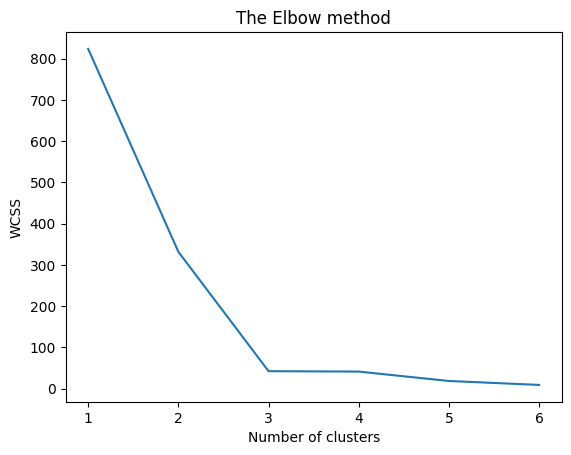

In [ ]:
wcss=[]
data_clustering = df.loc[:,['Diện tích', 'Mức giá', 'Số tầng', 'Số phòng ngủ', 'Số toilet']].copy()

for i in range(1, 7):
  X, _ = make_blobs(n_samples=10, centers=3, n_features=5)
  data_clustering = pd.DataFrame(X, columns=['Diện tích', 'Mức giá', 'Số tầng', 'Số phòng ngủ', 'Số toilet'])
  kmeans = KMeans(n_clusters=i)
  y = kmeans.fit_predict(data_clustering[['Diện tích', 'Mức giá', 'Số tầng', 'Số phòng ngủ', 'Số toilet']])

  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1, 7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(df[['Diện tích', 'Mức giá', 'Số tầng', 'Số phòng ngủ', 'Số toilet']])
print(y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 1 ... 1 1 1]


In [ ]:
# data_clustering = data.loc[:,['Diện tích', 'Mức giá', 'Số tầng', 'Số phòng ngủ', 'Số toilet']]
# data_clustering.insert(data_clustering.shape[1], "clustering id", y, True)
# data_clustering

df.insert(df.shape[1], "clustering id", y, True)
df.head()

,Địa chỉ,Khu vực,phường/xã,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Diện tích,Mức giá,Số tầng,Số phòng ngủ,Số toilet,dự án/số hẻm đường,clustering id
0,"Đường Trần Hưng Đạo, Phường Nguyễn Cư Trinh, Q...",Quận 1,Nguyễn Cư Trinh,179,466,873,374.0,180000.0,0,0,0,Đường Trần Hưng Đạo,0
1,"Phố Nguyễn Xí, Phường 13, Bình Thạnh, Hồ Chí Minh",Bình Thạnh,13,102,139,421,100.0,9500.0,2,2,3,Phố Nguyễn Xí,1
2,"Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức,Linh Chiểu,60,85,259,115.7,12500.0,4,4,3,Đường Số 8,1
3,"Đường Nguyễn Thị Minh Khai, Phường 5, Quận 3, ...",Quận 3,5,180,485,796,180.0,70000.0,7,0,0,Đường Nguyễn Thị Minh Khai,1
4,"Đường Nguyễn Trọng Tuyển, Phường 1, Tân Bình, ...",Tân Bình,1,155,195,454,157.0,33000.0,0,5,6,Đường Nguyễn Trọng Tuyển,1


In [ ]:
column_name = ['Diện tích', 'Số tầng', 'Số phòng ngủ', 'Số toilet']
for i in [0, 1, 2]:
  data_clustering_i = df.loc[df["clustering id"] == i]
  for column in column_name:
    median_column = data_clustering_i.loc[(data_clustering_i[column] != 0), column].median()
    if column != 'Diên tích':
      median_column = int(median_column)

    df.loc[(df['clustering id'] == i) & (df[column] == 0), column] = median_column

In [ ]:
df.drop(['clustering id'], axis=1, inplace=True)
print(df.shape)
df.head()

(17914, 12)


,Địa chỉ,Khu vực,phường/xã,Khoảng giá phổ biến Min,Giá phổ biến nhất,Khoảng giá phổ biến Max,Diện tích,Mức giá,Số tầng,Số phòng ngủ,Số toilet,dự án/số hẻm đường
0,"Đường Trần Hưng Đạo, Phường Nguyễn Cư Trinh, Q...",Quận 1,Nguyễn Cư Trinh,179,466,873,374.0,180000.0,4,5,6,Đường Trần Hưng Đạo
1,"Phố Nguyễn Xí, Phường 13, Bình Thạnh, Hồ Chí Minh",Bình Thạnh,13,102,139,421,100.0,9500.0,2,2,3,Phố Nguyễn Xí
2,"Đường Số 8, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",Thủ Đức,Linh Chiểu,60,85,259,115.7,12500.0,4,4,3,Đường Số 8
3,"Đường Nguyễn Thị Minh Khai, Phường 5, Quận 3, ...",Quận 3,5,180,485,796,180.0,70000.0,7,4,4,Đường Nguyễn Thị Minh Khai
4,"Đường Nguyễn Trọng Tuyển, Phường 1, Tân Bình, ...",Tân Bình,1,155,195,454,157.0,33000.0,3,5,6,Đường Nguyễn Trọng Tuyển


# IX. Lưu dataset đã qua làm sạch dữ liệu thành file CSV

## 9.1 Hàm liên quan

In [ ]:
import joblib
# Hàm để lưu mô hình hoặc kết quả GridSearchCV ra file pkl.
# Ví dụ cho tham số: GridSearchObject = GS_RFR, FileName = "model_RFR".
def save_GridSearchModel(GridSearchObject, FileName):
  NameToSave = str(FileName) + '.pkl'
  joblib.dump(GridSearchObject, NameToSave)
  print(NameToSave, "saving completed!")
# Hàm để nạp mô hình hoặc kết quả, biến nào đó có trong file pkl.
# Ví dụ tham số đầu vào: "model_XGB.pkl", "kv_px_dictionary.pkl", ...
def load_Model(FileName):
  GS = joblib.load(str(FileName))
  print("Loading", FileName)
  return GS

# Lưu dataframe ra file CSV.
def DataFrameToCSV(dataset, fileName):
  #dataset.to_csv('/content/drive/My Drive/DACNTT2/' + str(fileName) + '.csv') # Nếu dùng Google Drive kết nối với Google Colab.
  dataset.to_csv(str(fileName) + '.csv') # Trường hợp dùng Local hoặc Google Colab bình thường.

## 9.2 Lưu lại dictionary khoảng giá theo địa phương

In [ ]:
print("Khoảng giá Min Dictionary length =", len(KhoangGiaMin_dict2))
print("Giá phổ biến nhất Dictionary length =", len(KhoangGiaPhoBienNhat_dict2))
print("Khoảng giá Max Dictionary length =", len(KhoangGiaMax_dict2))
kv_px_dict = {}
for key in KhoangGiaMax_dict2:
  if (key not in KhoangGiaMin_dict2) or (key not in KhoangGiaPhoBienNhat_dict2):
    continue
  else:
    if key not in kv_px_dict:
      kv_px_dict[key] = []
    # Cập nhật value của key đang xét (key đã có hay key mới thì đều phải append).
    if (key in KhoangGiaMin_dict2) and (key in KhoangGiaPhoBienNhat_dict2) and (key in KhoangGiaMax_dict2):
      kv_px_dict[key].append(min(KhoangGiaMin_dict2[key]))
      kv_px_dict[key].append(statistics.mode(KhoangGiaPhoBienNhat_dict2[key]))
      kv_px_dict[key].append(statistics.mode(KhoangGiaPhoBienNhat_dict2[key]))
      kv_px_dict[key].append(statistics.mode(KhoangGiaPhoBienNhat_dict2[key]))
      kv_px_dict[key].append(max(KhoangGiaMax_dict2[key]))
    else:
      kv_px_dict[key].append(KhoangGiaMax_dict2[key])
print("Dictionary tổng hợp length =", len(kv_px_dict))
save_GridSearchModel(kv_px_dict, "kv_px_KhoangGiaDict") # Tổng hợp 3 khoảng giá của tất cả địa phương hợp lệ.

Khoảng giá Min Dictionary length = 327
Giá phổ biến nhất Dictionary length = 327
Khoảng giá Max Dictionary length = 331
Dictionary tổng hợp length = 325
kv_px_KhoangGiaDict.pkl saving completed!


## 9.3 Lưu lại dictionary dự án/số hẻm đường theo địa phương

In [ ]:
kv_px_dict = load_Model("kv_px_KhoangGiaDict.pkl")
kv_px_shd_dict = {} # Biến dictionary để lưu Số Hẻm Đường theo cặp khu vực & phường xã.

Loading kv_px_KhoangGiaDict.pkl


In [ ]:
for diaphuongName in kv_px_dict:
  KhuVuc = diaphuongName.split("_")[0] # ví dụ: "Quận 1_Nguyễn Cư Trinh" -> "Quận 1".
  PhuongXa = diaphuongName.split("_")[1] # ví dụ: "Quận 1_Nguyễn Cư Trinh" -> "Nguyễn Cư Trinh".
  if diaphuongName not in kv_px_shd_dict:
    kv_px_shd_dict[diaphuongName] = []
  for ind in df.index:
    # Nếu dòng đang duyệt thuộc địa phương đang xét và là value chưa có của key nọ, thì:
    if (KhuVuc in df['Khu vực'][ind]) and (PhuongXa in df['phường/xã'][ind]) and (df['dự án/số hẻm đường'][ind] not in kv_px_shd_dict[diaphuongName]):
      kv_px_shd_dict[diaphuongName].append(df['dự án/số hẻm đường'][ind]) # Lưu lại Số Hẻm Đường của nó.
    else:
      continue
print("Số Khoảng giá theo địa phương hợp lệ:", len(kv_px_dict))
print("Số Số Hẻm Đường theo địa phương hợp lệ:", len(kv_px_shd_dict))
save_GridSearchModel(kv_px_shd_dict, "kv_px_shdDict")

Số Khoảng giá theo địa phương hợp lệ: 325
Số Số Hẻm Đường theo địa phương hợp lệ: 325
kv_px_shdDict.pkl saving completed!


## 9.4 Lưu Dataset đã qua làm sạch dữ liệu

In [ ]:
# Tái sắp xếp lại trật tự các cột trong Dataset kết quả:
final_df = df[['Địa chỉ', 'Khu vực', 'phường/xã', 'dự án/số hẻm đường', 'Khoảng giá phổ biến Min', 'Giá phổ biến nhất', 'Khoảng giá phổ biến Max', 'Diện tích', 'Số tầng', 'Số phòng ngủ', 'Số toilet', 'Mức giá']]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17914 entries, 0 to 17913
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Địa chỉ                      17914 non-null  object 
 1   Khu vực                      17914 non-null  object 
 2   phường/xã                    17914 non-null  object 
 3   dự án/số hẻm đường           17914 non-null  object 
 4   Khoảng giá phổ biến Min  17914 non-null  int64  
 5   Giá phổ biến nhất            17914 non-null  int64  
 6   Khoảng giá phổ biến Max  17914 non-null  int64  
 7   Diện tích                    17914 non-null  float64
 8   Số tầng                      17914 non-null  int64  
 9   Số phòng ngủ                 17914 non-null  int64  
 10  Số toilet                    17914 non-null  int64  
 11  Mức giá                      17914 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 1.6+ MB


In [ ]:
DataFrameToCSV(final_df, "datasetAfterDataCleaning")